# **Part 2 - Can we omit some controls?**

Graph the DAG that represents the following causal effects:

*   $X$ → $Y$  
*   $Z_1$ → $X$, $Z_1$ → $Y$
*   $Z_2$ → $X$, $Z_2$ → $Y$
*   $Z_3$ → $Z_2$, $Z_3$ → $Y$

Assume that every causal arrow represents a true effect of one and simulate the data (just like in the lab).  
So for example $Z_1$ → $X$ means that $Z_1$ = $ε$<sub>$Z$<sub>$1$</sub></sub> and $X$ = $Z_1$ $+$ $ε_X$

***DAG***

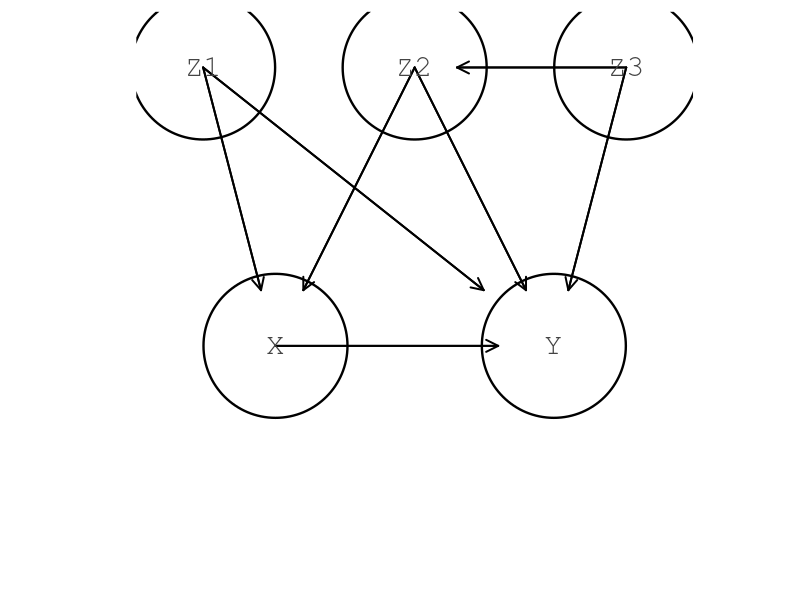

In [37]:
using Plots

# DAG
fig = plot(size=(800, 600), aspect_ratio=:equal, legend=false, 
           grid=false, axis=false, background_color=:white)

# Posiciones de nodos
Z1 = [0.12, 0.90]
Z2 = [0.50, 0.90]
Z3 = [0.88, 0.90]
X = [0.25, 0.40]
Y = [0.75, 0.40]

# Nodos
scatter!([Z1[1]], [Z1[2]], markersize=80, markercolor=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="")
annotate!(Z1[1], Z1[2], text("Z1", 16, "sans-serif", :bold, :center))

scatter!([Z2[1]], [Z2[2]], markersize=80, markercolor=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="")
annotate!(Z2[1], Z2[2], text("Z2", 16, "sans-serif", :bold, :center))

scatter!([Z3[1]], [Z3[2]], markersize=80, markercolor=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="")
annotate!(Z3[1], Z3[2], text("Z3", 16, "sans-serif", :bold, :center))

scatter!([X[1]], [X[2]], markersize=80, markercolor=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="")
annotate!(X[1], X[2], text("X", 16, "sans-serif", :bold, :center))

scatter!([Y[1]], [Y[2]], markersize=80, markercolor=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="")
annotate!(Y[1], Y[2], text("Y", 16, "sans-serif", :bold, :center))

# Flechas
# X → Y
quiver!([X[1]], [X[2]], quiver=([(Y[1]-X[1])*0.8], [(Y[2]-X[2])*0.8]), 
        linewidth=2, color=:black)

# Z1 → X
quiver!([Z1[1]], [Z1[2]], quiver=([(X[1]-Z1[1])*0.8], [(X[2]-Z1[2])*0.8]), 
        linewidth=2, color=:black)

# Z1 → Y
quiver!([Z1[1]], [Z1[2]], quiver=([(Y[1]-Z1[1])*0.8], [(Y[2]-Z1[2])*0.8]), 
        linewidth=2, color=:black)

# Z2 → X
quiver!([Z2[1]], [Z2[2]], quiver=([(X[1]-Z2[1])*0.8], [(X[2]-Z2[2])*0.8]), 
        linewidth=2, color=:black)

# Z2 → Y
quiver!([Z2[1]], [Z2[2]], quiver=([(Y[1]-Z2[1])*0.8], [(Y[2]-Z2[2])*0.8]), 
        linewidth=2, color=:black)

# Z3 → Z2
quiver!([Z3[1]], [Z3[2]], quiver=([(Z2[1]-Z3[1])*0.8], [(Z2[2]-Z3[2])*0.8]), 
        linewidth=2, color=:black)

# Z3 → Y
quiver!([Z3[1]], [Z3[2]], quiver=([(Y[1]-Z3[1])*0.8], [(Y[2]-Z3[2])*0.8]), 
        linewidth=2, color=:black)

xlims!(0.0, 1.0)
ylims!(0.0, 1.0)
savefig("dag_causal_part2.png")
display(fig)

***Simulación***

In [39]:
using GLM, DataFrames, Distributions, Random

# Set up
Random.seed!(42)
sample = rand(Float64, 1_000_000) .< 0.001

# Simulación del DAG
pop_Z1 = randn(1_000_000)
pop_Z3 = randn(1_000_000)
pop_Z2 = pop_Z3 + randn(1_000_000)
pop_X = pop_Z1 + pop_Z2 + randn(1_000_000)
pop_Y = pop_X + pop_Z1 + pop_Z2 + pop_Z3 + randn(1_000_000)

# Regresiones
println("=== Regresión 1: Y ~ X ===")
df1 = DataFrame(Y=pop_Y[sample], X=pop_X[sample])
println(lm(@formula(Y ~ X + 0), df1))

println("\n=== Regresión 2: Y ~ X + Z1 ===")
df2 = DataFrame(Y=pop_Y[sample], X=pop_X[sample], Z1=pop_Z1[sample])
println(lm(@formula(Y ~ X + Z1 + 0), df2))

println("\n=== Regresión 3: Y ~ X + Z2 ===")
df3 = DataFrame(Y=pop_Y[sample], X=pop_X[sample], Z2=pop_Z2[sample])
println(lm(@formula(Y ~ X + Z2 + 0), df3))

println("\n=== Regresión 4: Y ~ X + Z3 ===")
df4 = DataFrame(Y=pop_Y[sample], X=pop_X[sample], Z3=pop_Z3[sample])
println(lm(@formula(Y ~ X + Z3 + 0), df4))

println("\n=== Regresión 5: Y ~ X + Z1 + Z2 + Z3 ===")
df5 = DataFrame(Y=pop_Y[sample], X=pop_X[sample], Z1=pop_Z1[sample], 
                Z2=pop_Z2[sample], Z3=pop_Z3[sample])
println(lm(@formula(Y ~ X + Z1 + Z2 + Z3 + 0), df5))

=== Regresión 1: Y ~ X ===
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X

Coefficients:
─────────────────────────────────────────────────────────────
     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────
X  1.97784   0.0281175  70.34    <1e-99    1.92266    2.03302
─────────────────────────────────────────────────────────────

=== Regresión 2: Y ~ X + Z1 ===
Float64}, Vector{Int64}}}}, Matrix{Float64}}{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{

Y ~ 0 + X + Z1

Coefficients:
────────────────────────────────────────────────────────────────
        Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────
X   1.97386     0.032657   60.44    <1

Focus your attention on the effect of $X$ on $Y$. The goal is to have a good estimation for the effect of $X$ on $Y$ with the least number of controls as possible. To do so, follow the following instructions. In one single graph, plot the point estimate with confidence intervals (significant at 1\%) of the following regressions.

*   $Y$ vs. $X$
*   $Y$ vs. $X$, $Z_1$
*   $Y$ vs. $X$, $Z_2$
*   $Y$ vs. $X$, $Z_1$, $Z_2$
*   $Y$ vs. $X$, $Z_1$, $Z_2$, $Z_3$

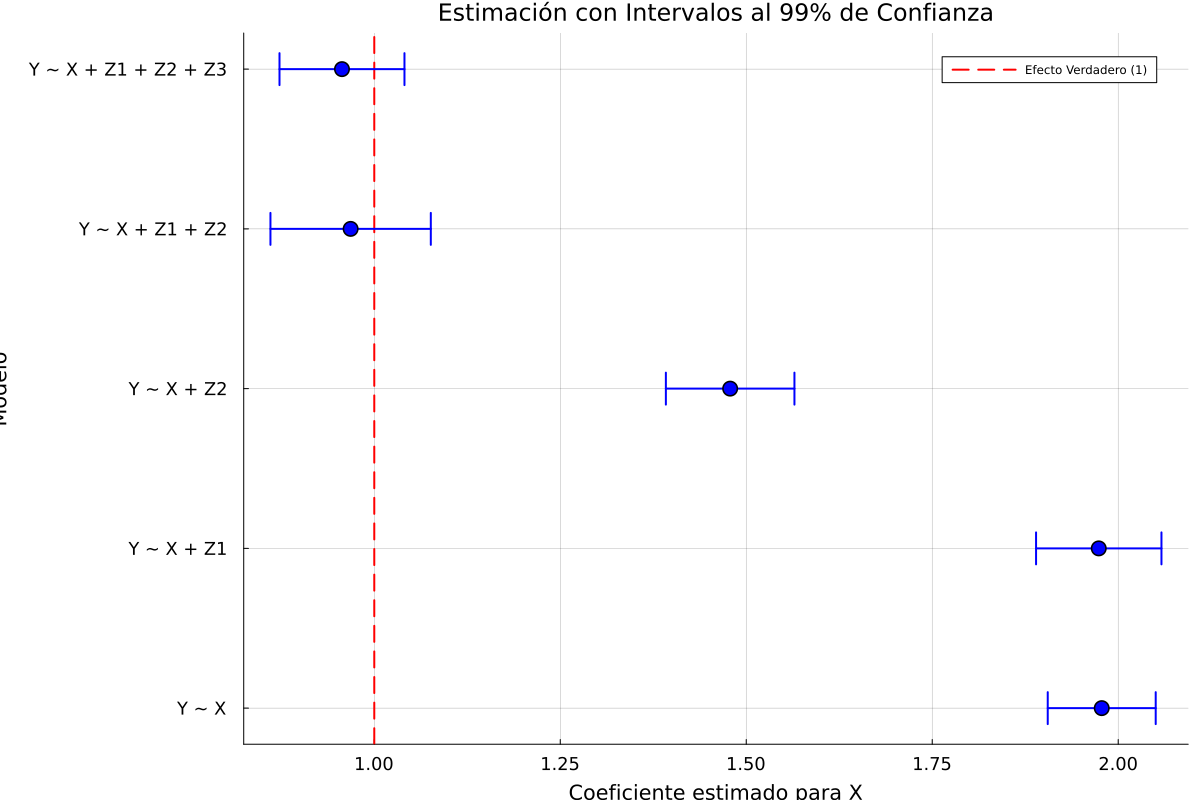

In [41]:
using GLM, DataFrames, Distributions, Random, Plots

# Set up
Random.seed!(42)
sample = rand(Float64, 1_000_000) .< 0.001
sample_indices = findall(sample)

# Simulación
pop_Z1 = randn(1_000_000)
pop_Z3 = randn(1_000_000)
pop_Z2 = pop_Z3 + randn(1_000_000)
pop_X = pop_Z1 + pop_Z2 + randn(1_000_000)
pop_Y = pop_X + pop_Z1 + pop_Z2 + pop_Z3 + randn(1_000_000)

# Función para obtener coeficiente e IC de X
function get_coef_ci(formula, data, var_name="X")
    model = lm(formula, data)
    coef_names = coefnames(model)
    idx = findfirst(x -> x == var_name, coef_names)
    
    coef_val = coef(model)[idx]
    ci = confint(model, level=0.99)
    ci_lower = ci[idx, 1]
    ci_upper = ci[idx, 2]
    
    return (coef_val, ci_lower, ci_upper)
end

results = []

# 1. Y ~ X
data1 = DataFrame(Y=pop_Y[sample_indices], X=pop_X[sample_indices])
coef1, ci1_lower, ci1_upper = get_coef_ci(@formula(Y ~ X + 0), data1, "X")
push!(results, ("Y ~ X", coef1, ci1_lower, ci1_upper))

# 2. Y ~ X + Z1
data2 = DataFrame(Y=pop_Y[sample_indices], X=pop_X[sample_indices], Z1=pop_Z1[sample_indices])
coef2, ci2_lower, ci2_upper = get_coef_ci(@formula(Y ~ X + Z1 + 0), data2, "X")
push!(results, ("Y ~ X + Z1", coef2, ci2_lower, ci2_upper))

# 3. Y ~ X + Z2
data3 = DataFrame(Y=pop_Y[sample_indices], X=pop_X[sample_indices], Z2=pop_Z2[sample_indices])
coef3, ci3_lower, ci3_upper = get_coef_ci(@formula(Y ~ X + Z2 + 0), data3, "X")
push!(results, ("Y ~ X + Z2", coef3, ci3_lower, ci3_upper))

# 4. Y ~ X + Z1 + Z2
data4 = DataFrame(Y=pop_Y[sample_indices], X=pop_X[sample_indices], Z1=pop_Z1[sample_indices], Z2=pop_Z2[sample_indices])
coef4, ci4_lower, ci4_upper = get_coef_ci(@formula(Y ~ X + Z1 + Z2 + 0), data4, "X")
push!(results, ("Y ~ X + Z1 + Z2", coef4, ci4_lower, ci4_upper))

# 5. Y ~ X + Z1 + Z2 + Z3
data5 = DataFrame(Y=pop_Y[sample_indices], X=pop_X[sample_indices], Z1=pop_Z1[sample_indices], 
                  Z2=pop_Z2[sample_indices], Z3=pop_Z3[sample_indices])
coef5, ci5_lower, ci5_upper = get_coef_ci(@formula(Y ~ X + Z1 + Z2 + Z3 + 0), data5, "X")
push!(results, ("Y ~ X + Z1 + Z2 + Z3", coef5, ci5_lower, ci5_upper))

# Preparar datos
model_names = [result[1] for result in results]
coefficients = [result[2] for result in results]
lower_bounds = [result[3] for result in results]
upper_bounds = [result[4] for result in results]

# Gráfico
y_pos = 1:length(model_names)

plt = plot(size=(1200, 800), legend=:topright, grid=true, gridalpha=0.3, 
           xlabel="Coeficiente estimado para X", 
           ylabel="Modelo",
           title="Estimación con Intervalos al 99% de Confianza",
           titlefontsize=16, guidefontsize=14, tickfontsize=12)

# Línea del efecto real
vline!([1.0], linestyle=:dash, linewidth=2, color=:red, label="Efecto Verdadero (1)")

# Intervalos de confianza y puntos
for (i, (coef, lower, upper)) in enumerate(zip(coefficients, lower_bounds, upper_bounds))
    plot!([lower, upper], [y_pos[i], y_pos[i]], 
          linewidth=2, color=:blue, label="")
    plot!([lower, lower], [y_pos[i]-0.1, y_pos[i]+0.1], 
          linewidth=2, color=:blue, label="")
    plot!([upper, upper], [y_pos[i]-0.1, y_pos[i]+0.1], 
          linewidth=2, color=:blue, label="")
    scatter!([coef], [y_pos[i]], markersize=8, color=:blue, label="")
end

# Configuración de ejes
yticks!(y_pos, model_names)

# Guardar y mostrar
savefig("estimacion_ic_part2.png")
display(plt)

Based on your results, answer the following



*   Which regressions seem to estimate the effect correctly?
*   Print a summary table for regressions (4) and (5). What can you comment on the point estimate and precesion?
*   Can you ignore some $Z$ $∈$ $Z_1$, $Z_2$, $Z_3$ and get a good estimate? Why do you think that is?

In [53]:
# Regresión 4: Y ~ X + Z₁ + Z₂
println("\n=== REGRESIÓN 4: Y ~ X + Z₁ + Z₂ ===")
model4 = lm(@formula(Y ~ X + Z1 + Z2 + 0), data4)
display(model4)
flush(stdout)

# Regresión 5: Y ~ X + Z₁ + Z₂ + Z₃  
println("\n\n=== REGRESIÓN 5: Y ~ X + Z₁ + Z₂ + Z₃ ===")
model5 = lm(@formula(Y ~ X + Z1 + Z2 + Z3 + 0), data5)
display(model5)
flush(stdout)


=== REGRESIÓN 4: Y ~ X + Z₁ + Z₂ ===


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z1 + Z2

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
X   0.968218   0.0417626  23.18    <1e-94   0.886265    1.05017
Z1  1.02681    0.0597095  17.20    <1e-57   0.909636    1.14398
Z2  1.51901    0.0517419  29.36    <1e-99   1.41747     1.62055
───────────────────────────────────────────────────────────────



=== REGRESIÓN 5: Y ~ X + Z₁ + Z₂ + Z₃ ===


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z1 + Z2 + Z3

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
X   0.956595   0.0325446  29.39    <1e-99   0.892731    1.02046
Z1  1.03557    0.0465268  22.26    <1e-88   0.944272    1.12688
Z2  0.940118   0.0463445  20.29    <1e-76   0.849173    1.03106
Z3  1.15812    0.0457227  25.33    <1e-99   1.0684      1.24785
───────────────────────────────────────────────────────────────

# **Análisis de Resultados**

### ***¿Qué regresiones estiman correctamente el efecto?***

Las regresiones **(4) Y ~ X + Z1 + Z2** y **(5) Y ~ X + Z1 + Z2 + Z3** estiman correctamente el efecto causal de X sobre Y (valor real = 1):
- **Regresión 4**: Coeficiente = 0.9682 (IC 99%: [0.857, 1.079])
- **Regresión 5**: Coeficiente = 0.9566 (IC 99%: [0.872, 1.041])

Las demás regresiones sobreestiman significativamente el efecto porque no controlan por los confounders necesarios (Z1 y Z2).

### ***Comparación de regresiones 4 y 5***

| Aspecto | Regresión 4 | Regresión 5 |
|---------|---------------|---------------|
| **Coef. de X** | 0.9682 | 0.9566 |
| **Error estándar** | 0.0418 | 0.0325 |
| **Coef. de Z1** | 1.0268 | 1.0356 |
| **Coef. de Z2** | 1.5190 | 0.9401 |
| **Coef. de Z3** | - | 1.1581 |

**Observación**

La regresión (5) es más precisa (menor error estándar: 0.0325 vs 0.0418) y todos sus coeficientes están más cercanos a los valores teóricos esperados. En la regresión (4), el coeficiente de Z2 está considerablemente inflado (1.519 vs 0.940) porque captura parte del efecto omitido de Z3, dado que Z3 es causa directa de Z2 en el DAG.

### ***¿Se puede ignorar alguna Z y obtener una buena estimación?***

Para estimar solo el efecto de X sobre Y, **sí se puede ignorar Z3**. La regresión (4) proporciona una estimación prácticamente correcta del efecto de X (0.9682 ≈ 1.0), con un intervalo de confianza al 99% que incluye el valor verdadero.

Sin embargo, omitir Z3 causa **sesgo de variable omitida** en los coeficientes de control, especialmente en Z2, que absorbe artificialmente parte del efecto de Z3 (coeficiente de 1.519 en lugar del correcto 0.940).

**Conclusión**

Si solo interesa el efecto de X sobre Y con el mínimo de variables de control, se puede usar la regresión (4) con Z1 y Z2, que da una estimación insesgada y precisa. Pero si se quiere entender correctamente toda la estructura causal sin sesgos en ningún coeficiente, la regresión (5) con todos los controles es superior por su mayor precisión (menor error estándar) y coeficientes correctos para todas las variables.